## RMSprop (Root Mean Square Propagation) 옵티마이저

RMSprop은 각 파라미터마다 적응적으로 학습률을 조절하는 최적화 알고리즘이다. Adagrad의 학습률이 단조롭게 감소하여 결국 0에 수렴하는 문제를 해결하기 위해, 기울기 제곱값의 **지수 이동 평균(Exponentially Moving Average)** 을 사용한다. 이를 통해 오래된 기울기 정보의 영향은 줄이고, 최신 기울기 정보에 더 집중하여 학습률을 조절하는 것이 핵심이다.

### 1. 기본 설정
예시에 필요한 `numpy`와 시각화를 위한 `matplotlib` 라이브러리를 임포트.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 2. 예시 데이터 준비
이전 옵티마이저 예제들과의 비교를 위해, 동일한 선형 관계(`y = 2x + 1`)를 갖는 데이터를 생성.

In [2]:
# 데이터 생성
X = 2 * np.random.rand(100, 1)
y = 1 + 2 * X + np.random.randn(100, 1) # y = 1 + 2x + noise

# 데이터 확인 (첫 5개)
print("X (입력) 샘플:\n", X[:5])
print("y (정답) 샘플:\n", y[:5])

X (입력) 샘플:
 [[0.57859102]
 [0.95503883]
 [1.13580744]
 [1.94937463]
 [1.62775711]]
y (정답) 샘플:
 [[0.82384207]
 [3.14355896]
 [3.39067995]
 [4.65448662]
 [3.8507103 ]]


### 3. RMSprop 구현 및 모델 학습

RMSprop 알고리즘을 단계별로 구현하여 모델의 최적 파라미터(`w`, `b`)를 찾아가는 과정.

1. `w`, `b`를 임의의 값으로 초기화하고, **기울기 제곱의 이동 평균을 저장할 변수 `s_w`, `s_b`를 0으로 초기화**.
2. 각 epoch마다 데이터 순서를 섞음 (SGD 기반).
3. 각 데이터 샘플에 대해 기울기를 계산.
4. **이동 평균 업데이트**: 감쇠율(`rho`)을 사용하여 `s_w`, `s_b`를 업데이트.
   - `s = rho * s + (1 - rho) * gradient**2`
5. **파라미터 업데이트**: 현재 기울기를 `s`의 제곱근으로 나누어 학습률을 조절한 뒤, 파라미터를 업데이트. 분모가 0이 되는 것을 방지하기 위해 작은 값 `epsilon`을 더함.
   - `parameter = parameter - learning_rate * gradient / (sqrt(s) + epsilon)`

In [3]:
# 하이퍼파라미터 설정
learning_rate = 0.01
n_epochs = 50
rho = 0.9  # 감쇠율 (decay rate), 보통 0.9를 사용
epsilon = 1e-8 # 분모가 0이 되는 것을 방지하기 위한 작은 값

# 모델 파라미터(가중치, 편향) 초기화
w = np.random.randn(1, 1)
b = np.random.randn(1, 1)

# 기울기 제곱의 이동 평균(moving average) 변수 초기화
s_w = np.zeros_like(w)
s_b = np.zeros_like(b)

# 데이터 개수
m = len(X)

print(f"초기 가중치 w: {w[0][0]:.4f}, 초기 편향 b: {b[0][0]:.4f}")

# 학습 과정 (SGD 기반으로 설명)
for epoch in range(n_epochs):
    indices = np.random.permutation(m)
    X_shuffled = X[indices]
    y_shuffled = y[indices]
    
    for i in range(m):
        xi = X_shuffled[i:i+1]
        yi = y_shuffled[i:i+1]
        
        # 예측 및 오차 계산
        y_pred = np.dot(xi, w) + b
        error = y_pred - yi
        
        # 기울기 계산
        gradient_w = 2 * xi.T.dot(error)
        gradient_b = 2 * np.sum(error)
        
        # 기울기 제곱의 이동 평균 업데이트
        s_w = rho * s_w + (1 - rho) * (gradient_w ** 2)
        s_b = rho * s_b + (1 - rho) * (gradient_b ** 2)
        
        # 파라미터 업데이트 (학습률 조절)
        w -= learning_rate * gradient_w / (np.sqrt(s_w) + epsilon)
        b -= learning_rate * gradient_b / (np.sqrt(s_b) + epsilon)
        
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1:2d}: w = {w[0][0]:.4f}, b = {b[0][0]:.4f}")

초기 가중치 w: 0.5285, 초기 편향 b: 0.3940
Epoch 10: w = 1.8445, b = 1.1465
Epoch 20: w = 1.9101, b = 1.0310
Epoch 30: w = 1.9196, b = 1.0107
Epoch 40: w = 1.9290, b = 0.9834
Epoch 50: w = 1.8952, b = 0.9677


### 4. 학습 결과 확인

학습 완료 후의 최종 `w`와 `b`를 확인하여 실제 값(`w=2`, `b=1`)에 얼마나 근사하는지 비교.

In [4]:
print("===== 학습 완료 ====")
print(f"최종 가중치 w: {w[0][0]:.4f}")
print(f"최종 편향 b: {b[0][0]:.4f}")
print("실제 값: w=2, b=1")

===== 학습 완료 ====
최종 가중치 w: 1.8952
최종 편향 b: 0.9677
실제 값: w=2, b=1


### 5. 학습된 모델 시각화

원본 데이터(산점도)와 RMSprop을 통해 학습된 선형 회귀 직선을 함께 시각화하여 결과 확인.

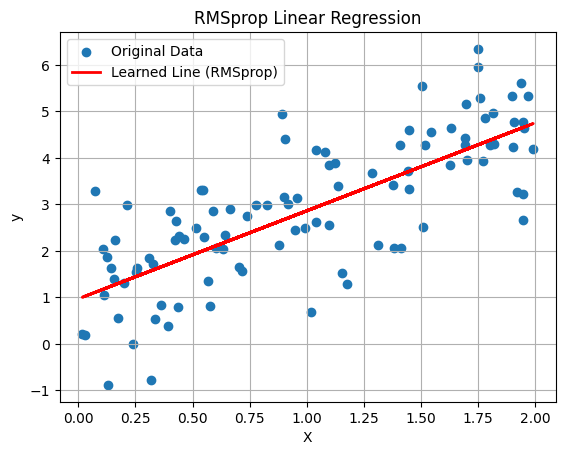

In [5]:
# 산점도로 원본 데이터 시각화
plt.scatter(X, y, label='Original Data')

# 학습된 선형 회귀선 시각화
y_pred_line = w * X + b
plt.plot(X, y_pred_line, color='red', linewidth=2, label='Learned Line (RMSprop)')

plt.xlabel('X')
plt.ylabel('y')
plt.title('RMSprop Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

### 6. 결론 및 요약

- **핵심 특징**: 각 파라미터마다 다른 크기의 학습률을 적용하는 **적응적 학습률(Adaptive Learning Rate)** 방법이다.
- **장점**: Adagrad의 학습률이 조기에 고갈되는 문제를 해결하여, 훈련 과정 내내 안정적인 학습률 유지가 가능하다. 특히 불안정한 손실 함수 환경에서 효과적이다.
- **고려사항**: `rho`(감쇠율)라는 추가 하이퍼파라미터가 필요하다. (일반적으로 0.9가 기본값으로 잘 작동한다.)
- **관계**: RMSprop은 이후에 등장하는 Adam 옵티마이저의 핵심 구성 요소 중 하나가 된다. (Adam = Momentum + RMSprop)

### 한 문장 요약

RMSprop은 기울기 제곱값의 지수 이동 평균을 통해 각 파라미터의 학습률을 동적으로 조절하는 적응형 최적화 알고리즘이다.